# Fashion-MNIST Image Classification using Deep Learning
### Fashion-MNIST consists of 60,000 training images and 10,000 test images. It is a MNIST-like fashion product database. The developers believe MNIST has been overused so they created this as a direct replacement for that dataset. Each image is in greyscale and associated with a label from 10 classes.

### Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total.

### Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255.

![c60ceb17.png?raw=true](https://github.com/zalandoresearch/fashion-mnist/blob/master/doc/img/c60ceb17.png?raw=true)

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte
/kaggle/input/fashionmnist/t10k-images-idx3-ubyte
/kaggle/input/fashionmnist/fashion-mnist_test.csv
/kaggle/input/fashionmnist/fashion-mnist_train.csv
/kaggle/input/fashionmnist/train-labels-idx1-ubyte
/kaggle/input/fashionmnist/train-images-idx3-ubyte


# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow


# Loading Data
### There are 10 different classes of images, as following:

### 0: T-shirt/top

### 1: Trouser

### 2: Pullover

### 3: Dress

### 4: Coat

### 5: Sandal

### 6: Shirt

### 7: Sneakers

### 8: Bag

### 9: Ankle boot

### Image dimmensions are 28x28.

## Spliting the Data into train and test set

In [3]:
(X_train, y_train), (X_test, y_test)= keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
X_train.shape , y_train.shape

((60000, 28, 28), (60000,))

In [5]:
X_test.shape , y_test.shape

((10000, 28, 28), (10000,))

In [6]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [8]:
# label
y_train[0] 

9

## Show Image

In [9]:
class_labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneakers','Bag','Ankle boot']

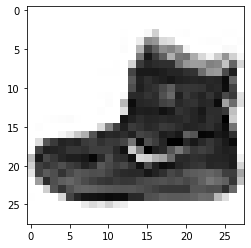

In [10]:
plt.imshow(X_train[0],cmap = 'Greys')

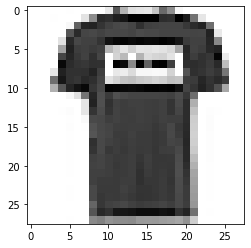

In [11]:
plt.imshow(X_train[1],cmap = 'Greys')

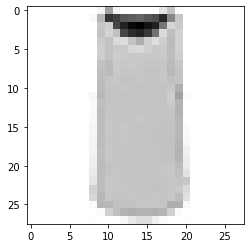

In [12]:
plt.imshow(X_train[2],cmap = 'Greys')

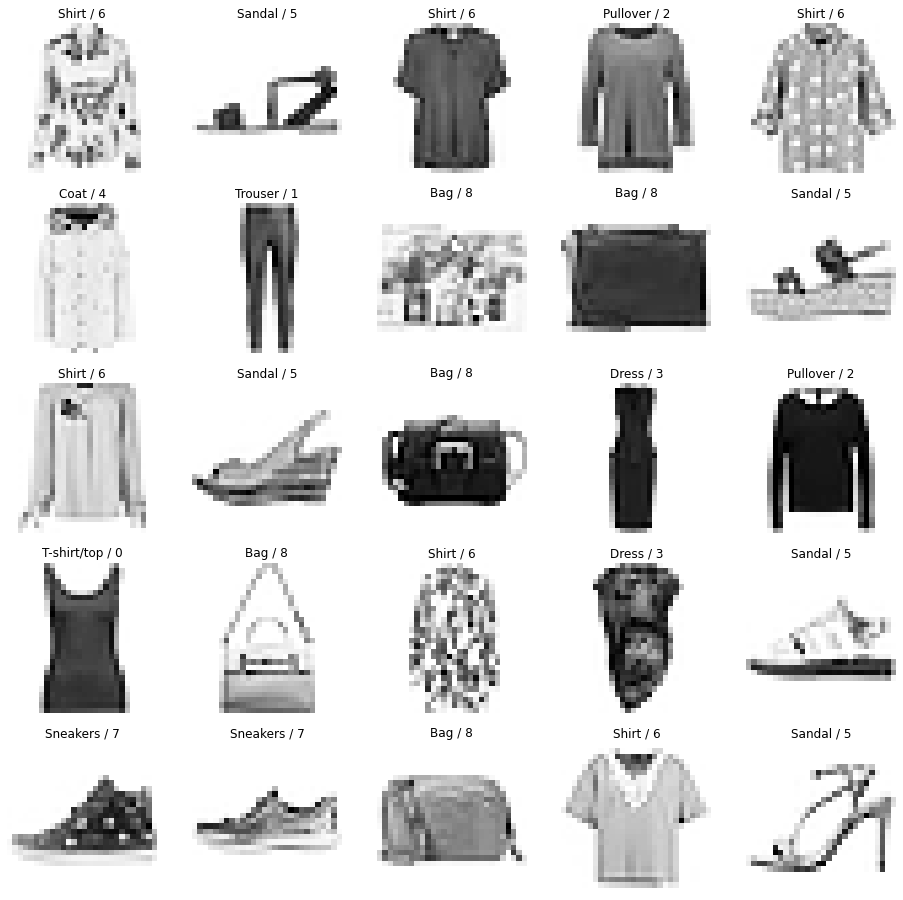

In [13]:
plt.figure(figsize=(16,16))
j = 1
for i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j); j+=1
  plt.imshow(X_train[i],cmap = 'Greys')
  plt.axis('off')
  plt.title('{} / {}'.format(class_labels[y_train[i]],y_train[i]))

[9 0 3 2 7 5 1 6 4 8]
[0, 1, 3, 5, 6, 8, 16, 18, 19, 23]
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)


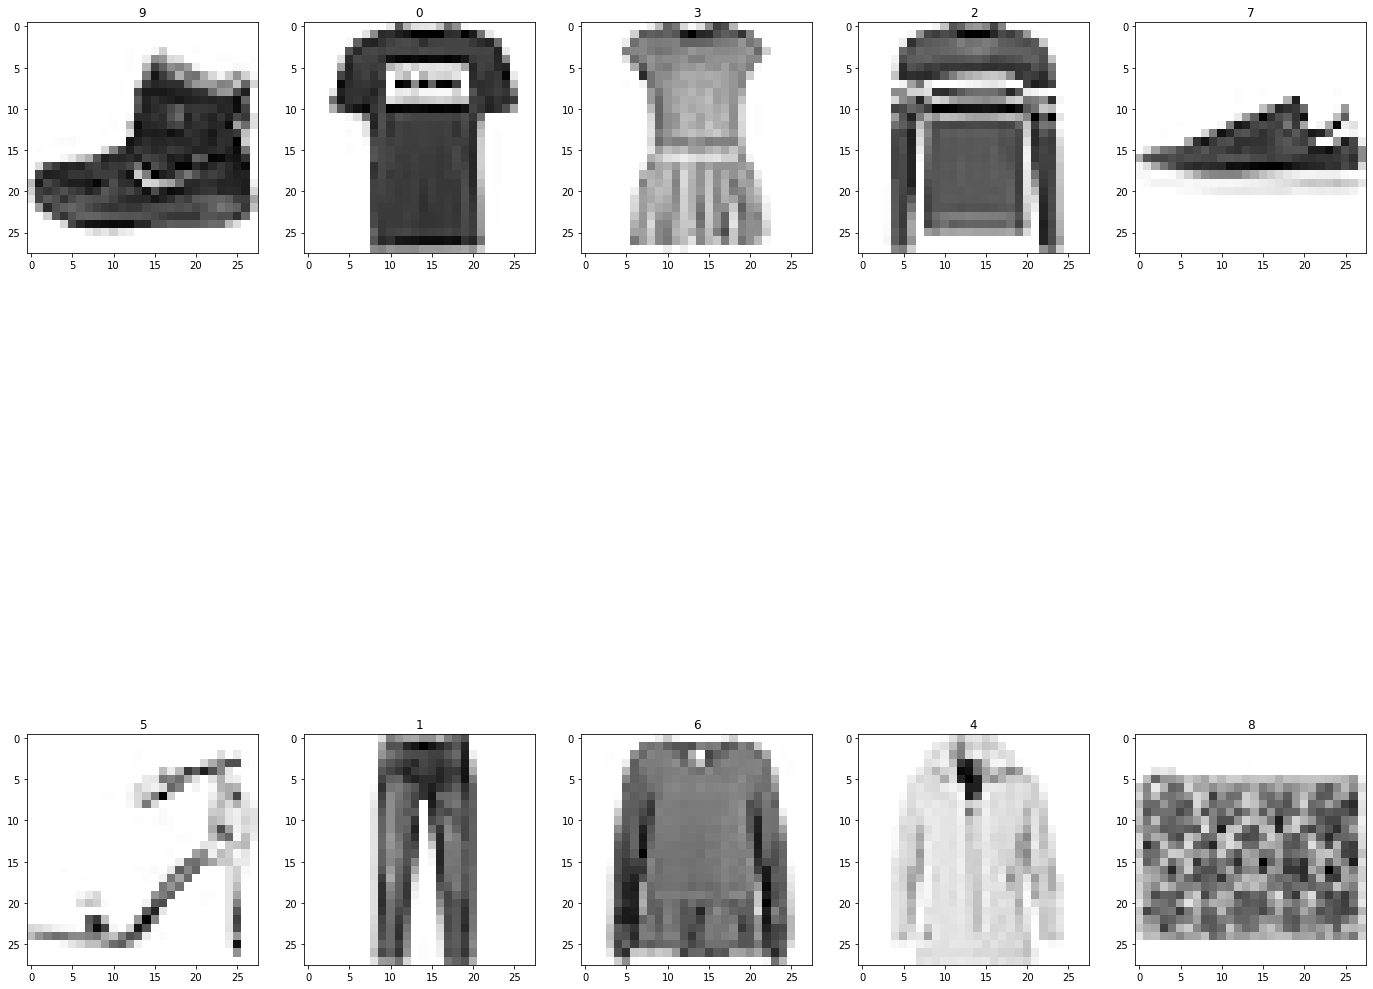

In [14]:
fashionMNIST = keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test) = fashionMNIST.load_data()
x_train = np.expand_dims(x_train,-1) # OR x_train=x_train.reshape(len(x_train),28,28,1)
x_test = np.expand_dims(x_test,-1) # OR x_test=x_test.reshape(len(x_test),28,28,1)
ei1 = np.array(pd.unique(y_train))
eindex1 = []
print(ei1)
for i in ei1:
    eindex1.append(list(y_train).index(i))
print(eindex1)
# #cross check 
# for i in eindex1:
#     print(y_train[i])

plt.figure(figsize=(24,24))
for x,y in enumerate(eindex1):
  print(x_train[y].shape)
  plt.subplot(2,5,x+1)
  plt.imshow(tensorflow.squeeze(x_train[y]),cmap="Greys")
  plt.title('{}'.format(ei1[x]))

## Change Dimensions

In [15]:
# 3 dimension image
X_train.ndim 

3

In [16]:
X_train.shape

(60000, 28, 28)

In [17]:
X_train  = np.expand_dims(X_train,-1)
X_test  = np.expand_dims(X_test,-1)

In [18]:
# 4 Dimension image
X_train.ndim 

4

In [19]:
X_train.shape

(60000, 28, 28, 1)

## Feature Scaling

In [20]:
X_train = X_train/255
X_test = X_test/255

In [21]:
# Data is in 0 to 1
X_train

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [22]:
X_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

## Spliting Dataset for validation set

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_val , y_train , y_val = train_test_split(X_train,y_train , test_size = 0.2 , random_state = 2020)

In [24]:
X_train.shape, y_train.shape

((48000, 28, 28, 1), (48000,))

In [25]:
X_val.shape, y_val.shape

((12000, 28, 28, 1), (12000,))

# Convolutional Neural Network(CNN)
### For the convolutional front-end, we can start with a Three convolutional layer with a small filter size and a modest number of filters (64) followed by a max pooling layer. The filter maps can then be flattened to provide features to the classifier.

### Given that the problem is a multi-class classification, we know that we will require an output layer with 10 nodes in order to predict the probability distribution of an image belonging to each of the 10 classes. This will also require the use of a softmax activation function. Between the feature extractor and the output layer, we can add a dense layer to interpret the features, in this case with 128 nodes.

### All layers will use the ReLU activation function and the He weight initialization scheme, both best practices.

![screen-shot-2016-08-07-at-9-15-21-pm.png](https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-07-at-9-15-21-pm.png)

In [26]:
model = keras.models.Sequential([
                         keras.layers.Conv2D(filters = 64 , kernel_size = 3,strides = (1,1), padding = 'valid',activation = 'relu',input_shape = [28,28,1]), # 1st Layer
                         keras.layers.MaxPooling2D(pool_size = (2,2)),

                         keras.layers.Conv2D(filters = 128 , kernel_size = 3,strides = (2,2), padding = 'same',activation = 'relu',input_shape = [28,28,1]), # 2nd Layer
                         keras.layers.MaxPooling2D(pool_size = (2,2)),

                         keras.layers.Conv2D(filters = 64 , kernel_size = 3,strides = (2,2), padding = 'same',activation = 'relu',input_shape = [28,28,1]), # 3rd Layer
                         keras.layers.MaxPooling2D(pool_size = (2,2)),

                         keras.layers.Flatten(),
                         keras.layers.Dense(units = 128,activation = 'relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units = 256,activation = 'relu'),
                         keras.layers.Dropout(0.5),
                         keras.layers.Dense(units = 256,activation = 'relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units = 128,activation = 'relu'),
                         keras.layers.Dropout(0.10),
                         keras.layers.Dense(units = 10,activation = 'softmax')  
                        
])

# Plotting The neural Network Work flow

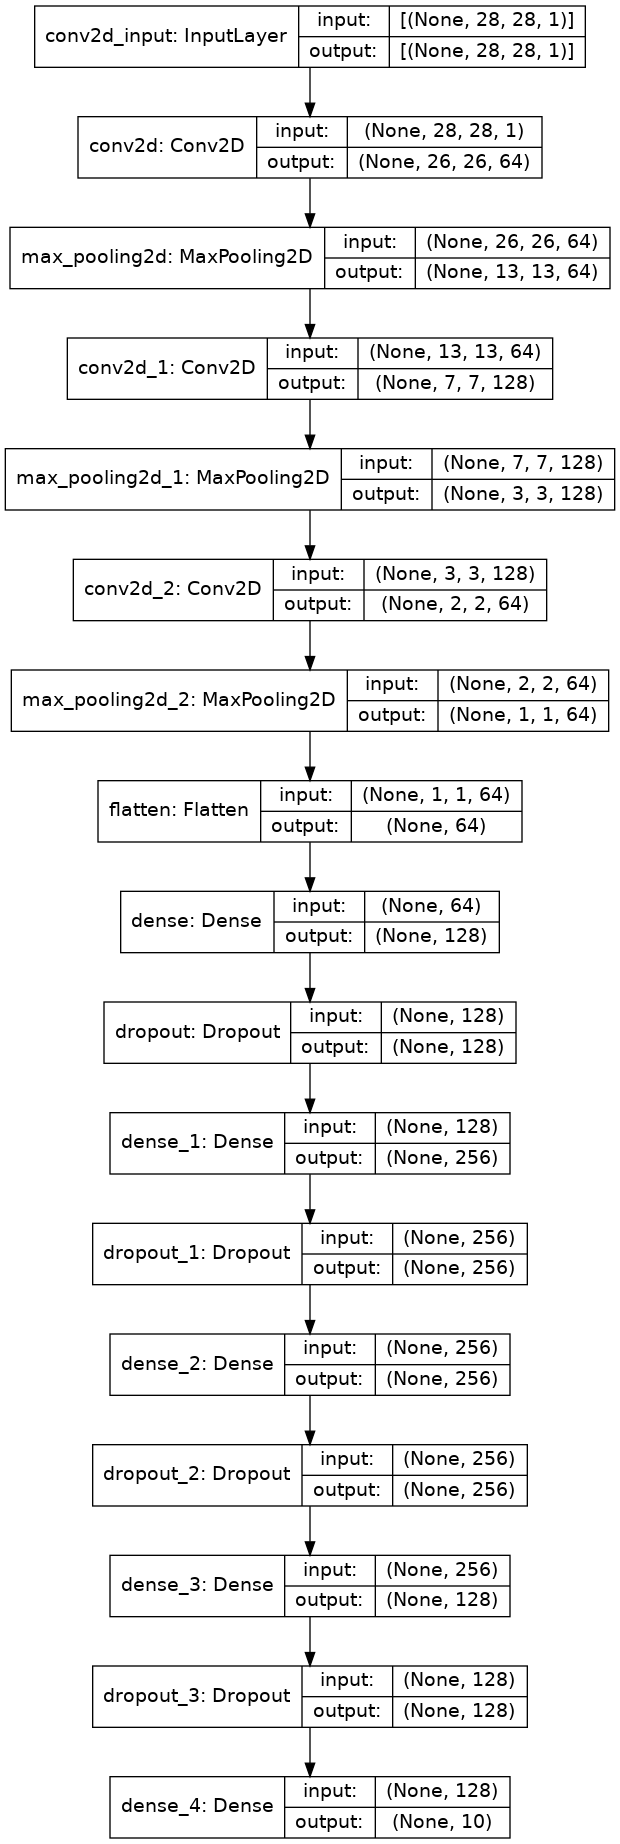

In [27]:
keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 64)          73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0

## Compile and Model Fitting

In [29]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [30]:
model.fit(X_train,y_train,epochs = 20,batch_size = 512,verbose = 1, validation_data=(X_val,y_val))

Epoch 1/20
94/94 [==============================] - 9s 39ms/step - loss: 1.7392 - accuracy: 0.3154 - val_loss: 0.6874 - val_accuracy: 0.7176
Epoch 2/20
94/94 [==============================] - 3s 32ms/step - loss: 0.6642 - accuracy: 0.7438 - val_loss: 0.5103 - val_accuracy: 0.8084
Epoch 3/20
94/94 [==============================] - 3s 32ms/step - loss: 0.5257 - accuracy: 0.8019 - val_loss: 0.4497 - val_accuracy: 0.8412
Epoch 4/20
94/94 [==============================] - 3s 32ms/step - loss: 0.4511 - accuracy: 0.8361 - val_loss: 0.3795 - val_accuracy: 0.8658
Epoch 5/20
94/94 [==============================] - 3s 32ms/step - loss: 0.3826 - accuracy: 0.8635 - val_loss: 0.3460 - val_accuracy: 0.8737
Epoch 6/20
94/94 [==============================] - 3s 32ms/step - loss: 0.3522 - accuracy: 0.8737 - val_loss: 0.3528 - val_accuracy: 0.8722
Epoch 7/20
94/94 [==============================] - 3s 32ms/step - loss: 0.3164 - accuracy: 0.8877 - val_loss: 0.3423 - val_accuracy: 0.8764
Epoch 8/20
94

## Testing the Model

In [31]:
# np.expand is used to change the 3 dimension data into 4 dimension
model.predict(np.expand_dims(X_test[0],axis = 0)).round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [32]:
np.argmax(model.predict(np.expand_dims(X_test[0],axis = 0)).round(2))

9

In [33]:
# cross check 
y_test[0]

9

In [34]:
y_pred = model.predict(X_test).round(2)
y_pred

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# Evaluation

In [35]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3087 - accuracy: 0.9017


[0.308687686920166, 0.9017000198364258]

### Accuracy given by Train set is 0.94 and Accuracy given by Test set is 0.90, Thus we can we say that our model is generalized so no overfitting nor underfitting.

# Confusion Matrix

<AxesSubplot:>

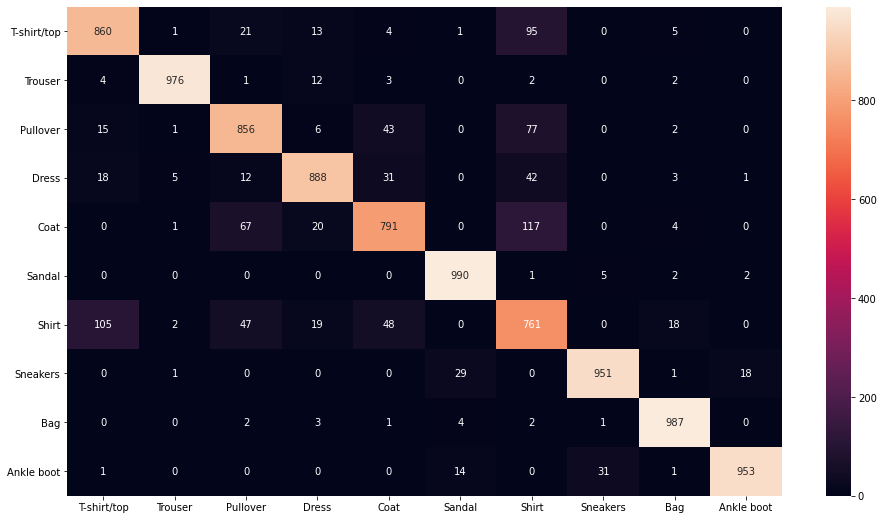

In [36]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize = (16,9))
y_pred_labels = [np.argmax(label) for label in y_pred]
cm = confusion_matrix(y_test,y_pred_labels)
sns.heatmap(cm , annot = True,fmt = 'd',xticklabels = class_labels,yticklabels = class_labels)

# Visualizing the Output

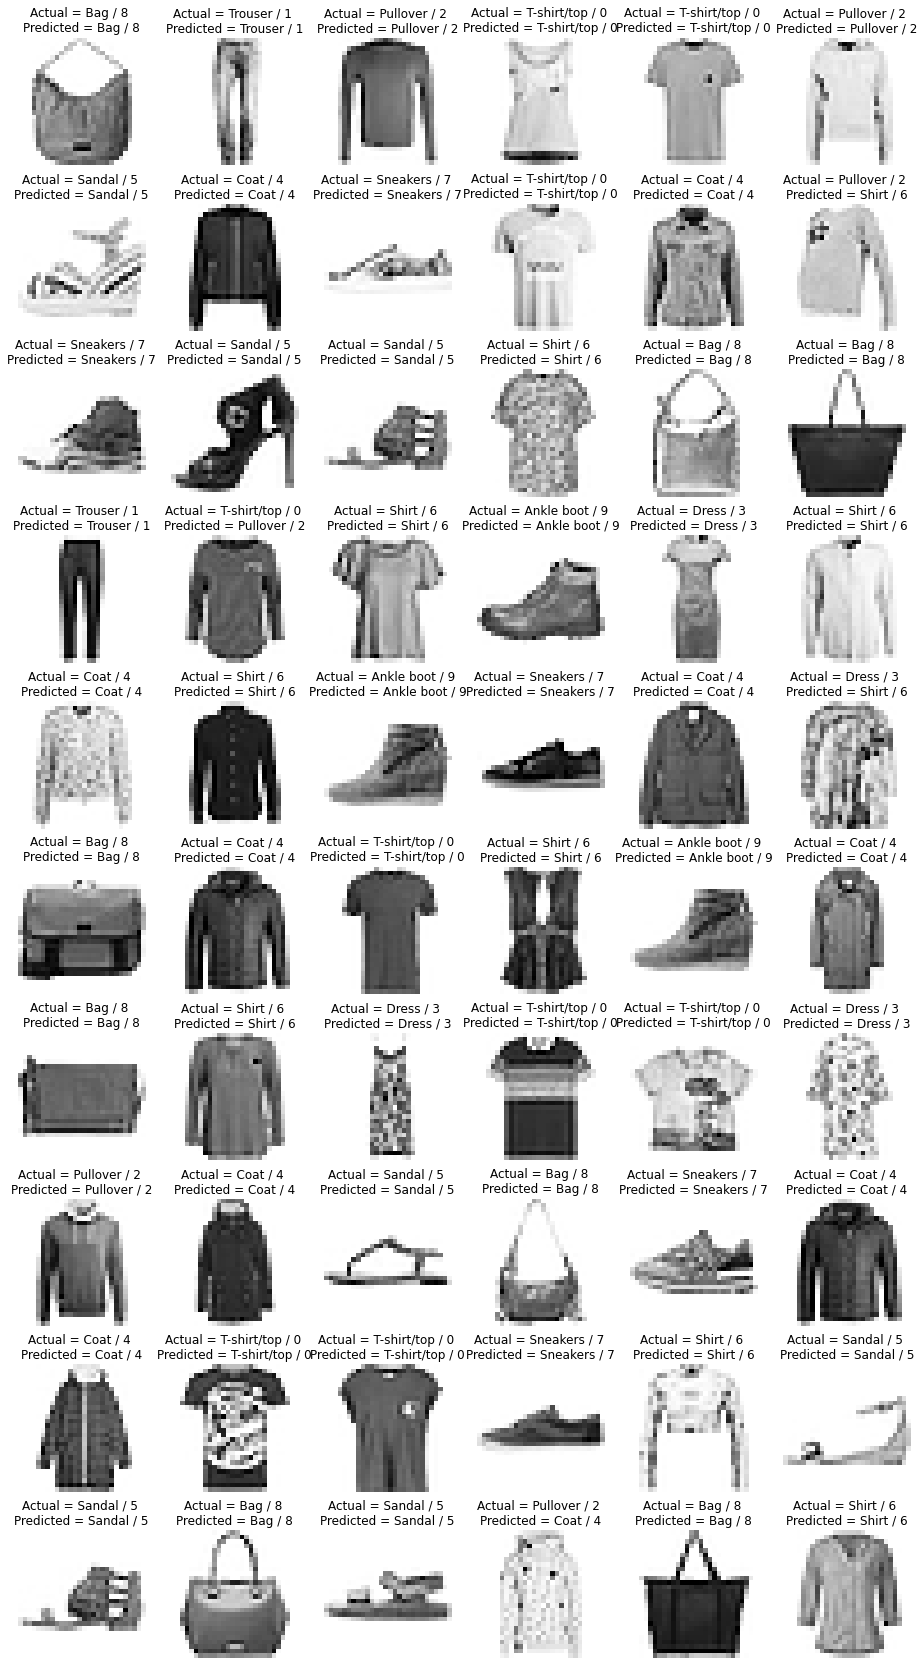

In [37]:
plt.figure(figsize=(16,30))
j = 1
for i in np.random.randint(0,1000,60):
  plt.subplot(10,6,j); j+=1
  plt.imshow(X_test[i].reshape(28,28),cmap = 'Greys')
  plt.axis('off')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]],y_test[i],class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))

In [38]:
from sklearn.metrics import classification_report
cr = classification_report (y_test,y_pred_labels,target_names = class_labels)
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.86      0.86      0.86      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.85      0.86      0.85      1000
       Dress       0.92      0.89      0.91      1000
        Coat       0.86      0.79      0.82      1000
      Sandal       0.95      0.99      0.97      1000
       Shirt       0.69      0.76      0.73      1000
    Sneakers       0.96      0.95      0.96      1000
         Bag       0.96      0.99      0.97      1000
  Ankle boot       0.98      0.95      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

